In [1]:
# Dependencies and Setup
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
# Name of the CSV file
file = 'Historical Interest Rate Data/Historical Interest Rate Data - 1990 - 2022.xlsx'

ir_df = pd.read_excel(file, sheet_name ='Sheet1', index_col=0, dtype={'Effective Date':'datetime64[ns]', 'Cash Rate Target': float})


Peak_1 = ir_df
Peak_1 = Peak_1[(Peak_1.index > "1994-07-26") & (Peak_1.index < "1994-12-15")]

Peak_2 = ir_df
Peak_2 = Peak_2[(Peak_2.index> "1999-10-05") & (Peak_2.index < "2000-09-07")]

Peak_3 = ir_df
Peak_3 = Peak_3[(Peak_3.index > "2007-07-03") & (Peak_3.index < "2008-03-06")]

Peak_4 = ir_df
Peak_4 = Peak_4[(Peak_4.index > "2009-09-01") & (Peak_4.index < "2010-06-03")]
#bx = ir_df.plot()


<Figure size 2400x1200 with 0 Axes>

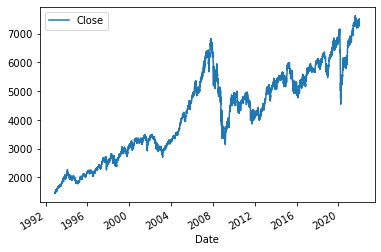

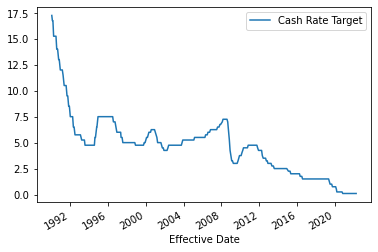

In [4]:
# We would like all available data from 01/01/2000 until 12/31/2016.
start_date = '1991-01-01'
end_date = '2021-12-31'

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
panel_data = data.DataReader('^AXJO', 'yahoo', start_date, end_date)

plt.figure(figsize=(16, 8), dpi=150)
ax = panel_data.plot(y='Close')
bx = ir_df.plot(label='Cash')


#PLOT USING TWINX

#fig, ax1 = plt.subplots()
#color = 'tab:red'
#ax1 = ax
#ax1.tick_params(axis='y')

#ax2 = ax1.twinx()



[]